# Notebook 01: Load and Explore Dataset

## 🎯 Objectives

This notebook demonstrates how to:
1. **Load** the synthetic IT call center tickets dataset from Hugging Face
2. **Explore** dataset structure, data quality, and completeness
3. **Analyze** incident characteristics (categories, types, contact channels)
4. **Examine** content quality and ground truth availability
5. **Visualize** key metrics and distributions
6. **Prepare** data for enrichment experiments

---

## 📋 Dataset Overview

**Source:** [Hugging Face - KameronB/synthetic-it-callcenter-tickets](https://huggingface.co/datasets/KameronB/synthetic-it-callcenter-tickets)

This dataset contains synthetic IT support tickets simulating real-world incidents and requests, ideal for demonstrating LLM-based incident enrichment tasks.


In [34]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys
import json

# Add src directory to path
sys.path.append(str(Path("../src").resolve()))

from utils import load_incident_dataset, calculate_basic_stats, prepare_incident_for_enrichment

# Set up plotting style
try:
    plt.style.use('seaborn-v0_8')
except OSError:
    try:
        plt.style.use('seaborn')
    except OSError:
        plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

print("Libraries imported successfully!")


Libraries imported successfully!


## 1. Load Dataset

We'll load the synthetic IT call center tickets dataset from Hugging Face. For faster experimentation, we can sample a subset of the data.


In [35]:
# Load dataset - adjust sample_size as needed
# Set sample_size=None to load full dataset, or specify a number (e.g., 200)
SAMPLE_SIZE = 200  # Use smaller sample for faster experiments
RANDOM_STATE = 42

df = load_incident_dataset(sample_size=SAMPLE_SIZE, random_state=RANDOM_STATE)

print(f"\nDataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")


Loading dataset from Hugging Face...
Sampled 200 records from dataset
Loaded 200 records

Dataset shape: (200, 24)
Columns: ['Unnamed: 0', 'number', 'type', 'date', 'contact_type', 'short_description', 'content', 'category', 'subcategory', 'customer', 'resolved_at', 'close_notes', 'agent', 'reassigned_count', 'resolution_time', 'issue/request', 'software/system', 'output', 'assignment_group', 'item_id', 'role', 'poor_close_notes', 'info_score_close_notes', 'info_score_poor_close_notes']


## 2. Basic Dataset Overview

Let's examine the first few rows and check data types.


In [36]:
# Display first few rows
df.head()


,Unnamed: 0,number,type,date,contact_type,short_description,content,category,subcategory,customer,...,resolution_time,issue/request,software/system,output,assignment_group,item_id,role,poor_close_notes,info_score_close_notes,info_score_poor_close_notes
26926,26926,REQ0098745,Request,4/26/2024 9:45,Email,Request to upgrade PIV card for enhanced access,I need to upgrade my current PIV card to the l...,PIV CARD,UPGRADE,"Taylor, Jordan",...,30.750000,PIV Card Upgrade,Piv Card,Software/System: Piv Card ; Issue/Request: PIV...,Security Access Team,4321,customer,No changes noted.,0.8,0.0
21053,21053,INC0047192,Incident,3/18/2021 14:15,Self-service,Google Workspace crashes when saving files,The customer reports that Google Workspace cra...,SOFTWARE,MALFUNCTION,"Barnes, Kathryn",...,174.480000,Google Workspace Crashing When Saving Files,Google Workspace,Software/System: Google Workspace ; Issue/Requ...,APPLICATION SUPPORT,6544,agent,Resolved,0.9,0.0
25548,25548,INC007473,Incident,2/13/2021 13:25,Email,Microsoft Intune Malfunction,Customer cannot use Microsoft Intune and is re...,SOFTWARE,ERROR,"Edwards, Ryan",...,5479.440979,Error - FATAL: password authentication failed ...,Microsoft Intune,Software/System: Microsoft Intune ; Issue/Requ...,TIER 2 TEAM,9298,agent,Issue resolved. Escalated to Security for furt...,0.8,0.1
15010,15010,TASK0041192,Request,2/11/2021 15:47,Phone,Request for LMSLite version 4.1 installation t...,Our project management team urgently needs the...,SOFTWARE,INSTALLATION,"Campbell, Samantha",...,117.030000,LMSLite Install Request,LMSLite,Software/System: LMSLite ; Issue/Request: LMSL...,APPLICATION SUPPORT,3556,customer,Software Installed,0.8,0.0
18299,18299,INC0055925,Incident,2/13/2021 13:25,Email,Investigated inventory sync issue,Customer reported that their Dell KACE invento...,SOFTWARE,ERROR,"Alexander, Charlotte",...,13016.383760,Inventory data not synchronized with the server.,Dell KACE Systems Management,Software/System: Dell KACE Systems Management ...,None,12712,agent,The inventory sync issue has been addressed. N...,0.6,0.0


In [37]:
# Check data types and missing values
print("Data Types:")
print(df.dtypes)
print("\n" + "="*50)
print("\nMissing Values:")
print(df.isnull().sum())
print("\n" + "="*50)
print("\nDataset Info:")
df.info()


Data Types:
Unnamed: 0                       int64
number                          object
type                            object
date                            object
contact_type                    object
short_description               object
content                         object
category                        object
subcategory                     object
customer                        object
resolved_at                     object
close_notes                     object
agent                           object
reassigned_count                 int64
resolution_time                float64
issue/request                   object
software/system                 object
output                          object
assignment_group                object
item_id                          int64
role                            object
poor_close_notes                object
info_score_close_notes         float64
info_score_poor_close_notes    float64
dtype: object


Missing Values:
Unnamed: 0          

## 3. Dataset Statistics

Calculate and display basic statistics about the dataset.


In [38]:
# Calculate basic statistics
stats = calculate_basic_stats(df)

print("📊 Dataset Statistics:")
print(f"Total incidents: {stats['total_incidents']}")
print(f"Incidents: {stats['incidents']}")
print(f"Requests: {stats['requests']}")
if stats['avg_resolution_time']:
    print(f"Average resolution time: {stats['avg_resolution_time']:.2f} minutes")
print(f"\nCategories distribution:")
for category, count in stats['categories'].items():
    print(f"  - {category}: {count}")


📊 Dataset Statistics:
Total incidents: 200
Incidents: 0
Requests: 46
Average resolution time: 6769.15 minutes

Categories distribution:
  - SOFTWARE: 177
  - PIV CARD: 9
  - ACCOUNT: 9
  - EMAIL: 3
  - PRINTER: 1
  - NETWORK: 1


## 4. Incident Characteristics Analysis

Create comprehensive visualizations to understand the dataset distribution across multiple dimensions:
- **Categories & Subcategories**: Distribution of incident types
- **Contact Channels**: How users report incidents
- **Incident Types**: Incident vs Request breakdown
- **Resolution Metrics**: Time to resolution and reassignments
- **Content Quality**: Text length and ground truth quality scores


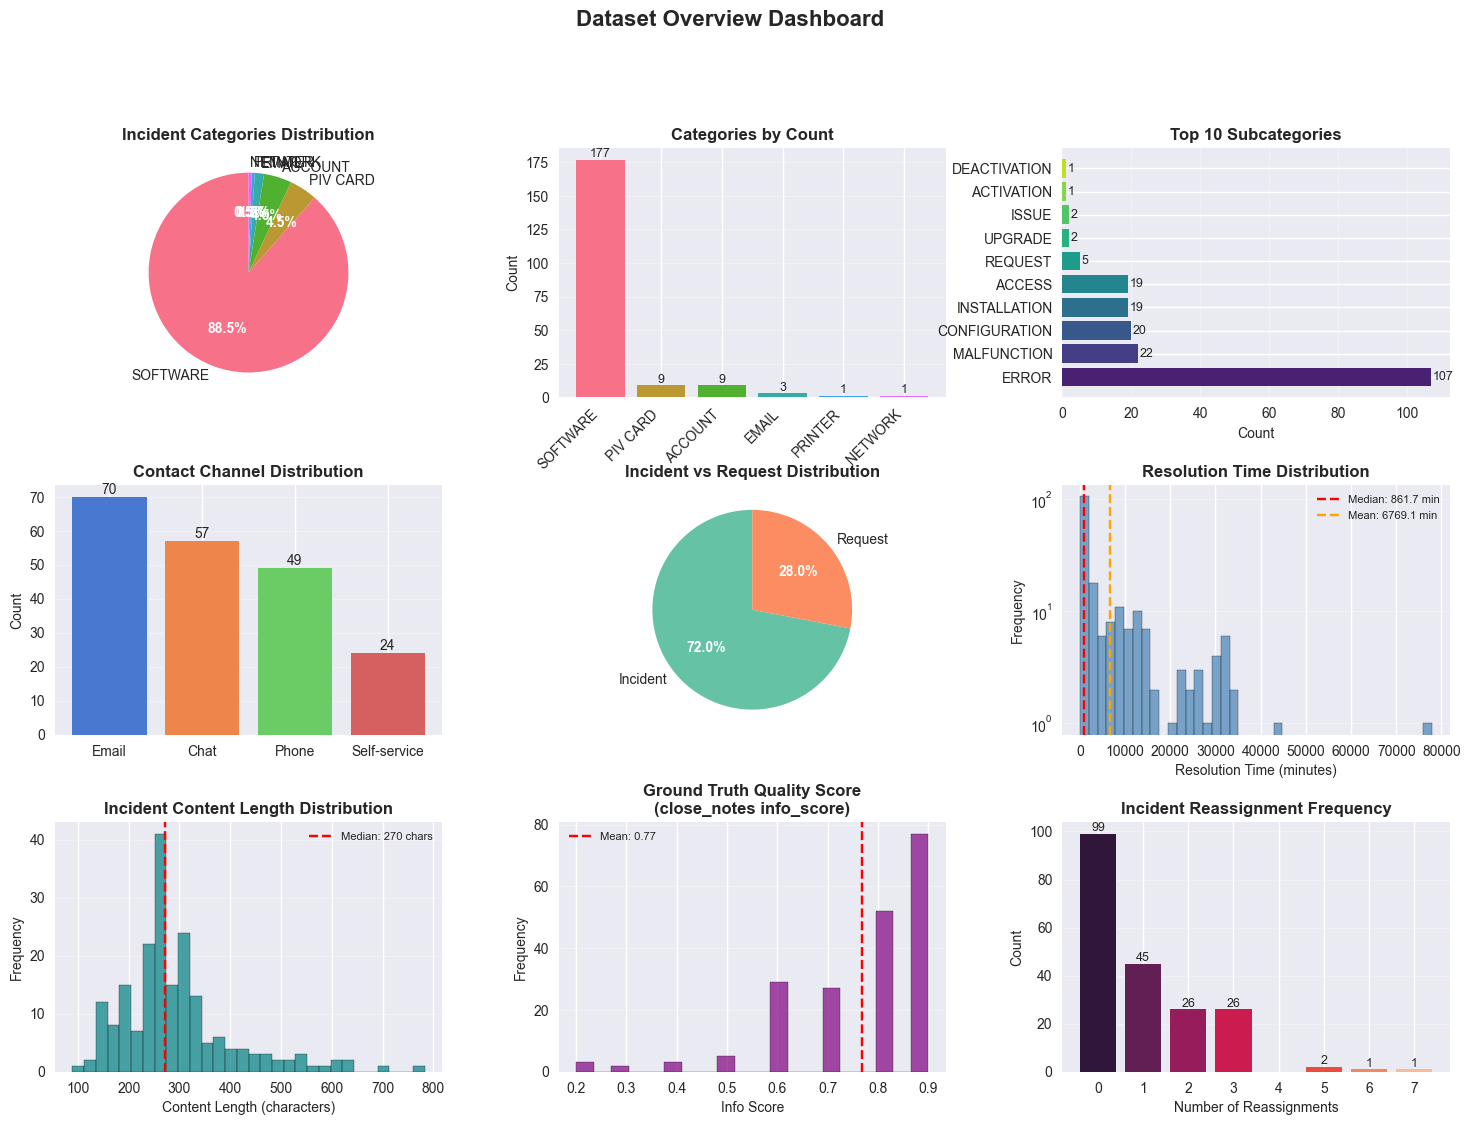


DATASET SUMMARY STATISTICS

📊 Categories: 6 unique categories
   Most common: SOFTWARE (177 incidents)

📋 Subcategories: 12 unique subcategories
   Most common: ERROR (107 incidents)

📞 Contact Channels: 4 channels
   Most used: Email (70 incidents)

⏱️  Resolution Time:
   Mean: 6769.1 minutes (112.8 hours)
   Median: 861.7 minutes (14.4 hours)
   Range: 0.0 - 77934.6 minutes

🔄 Reassignments:
   Mean: 0.99 reassignments per incident
   Max: 7 reassignments
   99 incidents (49.5%) had no reassignments


In [39]:
# Create comprehensive visualization dashboard
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.35, wspace=0.3)

# 1. Category Distribution (Pie Chart)
ax1 = fig.add_subplot(gs[0, 0])
if 'category' in df.columns:
    category_counts = df['category'].value_counts()
    colors = sns.color_palette("husl", len(category_counts))
    wedges, texts, autotexts = ax1.pie(
        category_counts.values, 
        labels=category_counts.index, 
        autopct='%1.1f%%',
        colors=colors,
        startangle=90
    )
    ax1.set_title('Incident Categories Distribution', fontsize=12, fontweight='bold')
    # Improve text readability
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')

# 2. Category Distribution (Bar Chart with counts)
ax2 = fig.add_subplot(gs[0, 1])
if 'category' in df.columns:
    category_counts = df['category'].value_counts()
    bars = ax2.bar(range(len(category_counts)), category_counts.values, color=colors)
    ax2.set_xticks(range(len(category_counts)))
    ax2.set_xticklabels(category_counts.index, rotation=45, ha='right')
    ax2.set_ylabel('Count', fontsize=10)
    ax2.set_title('Categories by Count', fontsize=12, fontweight='bold')
    ax2.grid(axis='y', alpha=0.3)
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}', ha='center', va='bottom', fontsize=9)

# 3. Top 10 Subcategories
ax3 = fig.add_subplot(gs[0, 2])
if 'subcategory' in df.columns:
    subcat_counts = df['subcategory'].value_counts().head(10)
    ax3.barh(range(len(subcat_counts)), subcat_counts.values, 
             color=sns.color_palette("viridis", len(subcat_counts)))
    ax3.set_yticks(range(len(subcat_counts)))
    ax3.set_yticklabels(subcat_counts.index)
    ax3.set_xlabel('Count', fontsize=10)
    ax3.set_title('Top 10 Subcategories', fontsize=12, fontweight='bold')
    ax3.grid(axis='x', alpha=0.3)
    # Add value labels
    for i, v in enumerate(subcat_counts.values):
        ax3.text(v + 0.5, i, str(v), va='center', fontsize=9)

# 4. Contact Type Distribution
ax4 = fig.add_subplot(gs[1, 0])
if 'contact_type' in df.columns:
    contact_counts = df['contact_type'].value_counts()
    bars = ax4.bar(contact_counts.index, contact_counts.values, 
                   color=sns.color_palette("muted", len(contact_counts)))
    ax4.set_ylabel('Count', fontsize=10)
    ax4.set_title('Contact Channel Distribution', fontsize=12, fontweight='bold')
    ax4.grid(axis='y', alpha=0.3)
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}', ha='center', va='bottom', fontsize=10)

# 5. Type Distribution (Incident vs Request)
ax5 = fig.add_subplot(gs[1, 1])
if 'type' in df.columns:
    type_counts = df['type'].value_counts()
    colors_type = sns.color_palette("Set2", len(type_counts))
    wedges, texts, autotexts = ax5.pie(
        type_counts.values,
        labels=type_counts.index,
        autopct='%1.1f%%',
        colors=colors_type,
        startangle=90
    )
    ax5.set_title('Incident vs Request Distribution', fontsize=12, fontweight='bold')
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')

# 6. Resolution Time Distribution
ax6 = fig.add_subplot(gs[1, 2])
if 'resolution_time' in df.columns and df['resolution_time'].notna().any():
    resolution_times = df['resolution_time'].dropna()
    ax6.hist(resolution_times, bins=40, edgecolor='black', alpha=0.7, color='steelblue')
    ax6.set_xlabel('Resolution Time (minutes)', fontsize=10)
    ax6.set_ylabel('Frequency', fontsize=10)
    ax6.set_title('Resolution Time Distribution', fontsize=12, fontweight='bold')
    ax6.set_yscale('log')
    ax6.grid(axis='y', alpha=0.3)
    # Add statistics
    ax6.axvline(resolution_times.median(), color='red', linestyle='--', 
                label=f'Median: {resolution_times.median():.1f} min')
    ax6.axvline(resolution_times.mean(), color='orange', linestyle='--', 
                label=f'Mean: {resolution_times.mean():.1f} min')
    ax6.legend(fontsize=8)

# 7. Content Length Analysis
ax7 = fig.add_subplot(gs[2, 0])
if 'content' in df.columns:
    df['content_length'] = df['content'].astype(str).str.len()
    ax7.hist(df['content_length'], bins=30, edgecolor='black', alpha=0.7, color='teal')
    ax7.set_xlabel('Content Length (characters)', fontsize=10)
    ax7.set_ylabel('Frequency', fontsize=10)
    ax7.set_title('Incident Content Length Distribution', fontsize=12, fontweight='bold')
    ax7.grid(axis='y', alpha=0.3)
    ax7.axvline(df['content_length'].median(), color='red', linestyle='--', 
                label=f'Median: {df["content_length"].median():.0f} chars')
    ax7.legend(fontsize=8)

# 8. Ground Truth Quality (Info Score)
ax8 = fig.add_subplot(gs[2, 1])
if 'info_score_close_notes' in df.columns:
    info_scores = df['info_score_close_notes'].dropna()
    if len(info_scores) > 0:
        ax8.hist(info_scores, bins=20, edgecolor='black', alpha=0.7, color='purple')
        ax8.set_xlabel('Info Score', fontsize=10)
        ax8.set_ylabel('Frequency', fontsize=10)
        ax8.set_title('Ground Truth Quality Score\n(close_notes info_score)', fontsize=12, fontweight='bold')
        ax8.grid(axis='y', alpha=0.3)
        ax8.axvline(info_scores.mean(), color='red', linestyle='--', 
                    label=f'Mean: {info_scores.mean():.2f}')
        ax8.legend(fontsize=8)

# 9. Reassignment Analysis
ax9 = fig.add_subplot(gs[2, 2])
if 'reassigned_count' in df.columns:
    reassign_counts = df['reassigned_count'].value_counts().sort_index()
    bars = ax9.bar(reassign_counts.index, reassign_counts.values, 
                   color=sns.color_palette("rocket", len(reassign_counts)))
    ax9.set_xlabel('Number of Reassignments', fontsize=10)
    ax9.set_ylabel('Count', fontsize=10)
    ax9.set_title('Incident Reassignment Frequency', fontsize=12, fontweight='bold')
    ax9.grid(axis='y', alpha=0.3)
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax9.text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height)}', ha='center', va='bottom', fontsize=9)

plt.suptitle('Dataset Overview Dashboard', fontsize=16, fontweight='bold', y=0.995)
plt.show()

# Print summary statistics
print("\n" + "="*80)
print("DATASET SUMMARY STATISTICS")
print("="*80)
if 'category' in df.columns:
    print(f"\n📊 Categories: {df['category'].nunique()} unique categories")
    print(f"   Most common: {df['category'].value_counts().index[0]} ({df['category'].value_counts().iloc[0]} incidents)")
if 'subcategory' in df.columns:
    print(f"\n📋 Subcategories: {df['subcategory'].nunique()} unique subcategories")
    print(f"   Most common: {df['subcategory'].value_counts().index[0]} ({df['subcategory'].value_counts().iloc[0]} incidents)")
if 'contact_type' in df.columns:
    print(f"\n📞 Contact Channels: {df['contact_type'].nunique()} channels")
    print(f"   Most used: {df['contact_type'].value_counts().index[0]} ({df['contact_type'].value_counts().iloc[0]} incidents)")
if 'resolution_time' in df.columns and df['resolution_time'].notna().any():
    rt = df['resolution_time'].dropna()
    print(f"\n⏱️  Resolution Time:")
    print(f"   Mean: {rt.mean():.1f} minutes ({rt.mean()/60:.1f} hours)")
    print(f"   Median: {rt.median():.1f} minutes ({rt.median()/60:.1f} hours)")
    print(f"   Range: {rt.min():.1f} - {rt.max():.1f} minutes")
if 'reassigned_count' in df.columns:
    print(f"\n🔄 Reassignments:")
    print(f"   Mean: {df['reassigned_count'].mean():.2f} reassignments per incident")
    print(f"   Max: {df['reassigned_count'].max()} reassignments")
    no_reassign = (df['reassigned_count'] == 0).sum()
    print(f"   {no_reassign} incidents ({no_reassign/len(df)*100:.1f}%) had no reassignments")
print("="*80)


## 5. Examine Sample Incidents

Let's look at a few sample incidents to understand the structure and content quality.


In [40]:
# Display a sample incident in detail
sample_incident = df.sample(1).iloc[0]

print("="*80)
print("SAMPLE INCIDENT")
print("="*80)
print(f"\n📋 Number: {sample_incident.get('number', 'N/A')}")
print(f"📅 Date: {sample_incident.get('date', 'N/A')}")
print(f"📞 Contact Type: {sample_incident.get('contact_type', 'N/A')}")
print(f"🏷️  Category: {sample_incident.get('category', 'N/A')}")
print(f"🏷️  Subcategory: {sample_incident.get('subcategory', 'N/A')}")
print(f"👤 Customer: {sample_incident.get('customer', 'N/A')}")
print(f"\n📝 Short Description:")
print(f"   {sample_incident.get('short_description', 'N/A')}")
print(f"\n📄 Content:")
print(f"   {sample_incident.get('content', 'N/A')[:500]}...")
if 'close_notes' in sample_incident and pd.notna(sample_incident.get('close_notes')):
    print(f"\n✅ Close Notes (Ground Truth):")
    print(f"   {sample_incident.get('close_notes', 'N/A')[:500]}...")
print("="*80)


SAMPLE INCIDENT

📋 Number: INC0043950
📅 Date: 2/27/2021 9:48
📞 Contact Type: Phone
🏷️  Category: ACCOUNT
🏷️  Subcategory: ACCESS
👤 Customer: Martin, Kevin

📝 Short Description:
   Unable to log in to Jenkins - 'Invalid Credentials' error

📄 Content:
   I tried logging in to Jenkins but keep getting 'Invalid Credentials' error even though I'm sure the password is right. Checked if there were any security changes but didn't find anything. Reached out to the Security Team for help....

✅ Close Notes (Ground Truth):
   User reported being unable to log in to Jenkins due to 'Invalid Credentials' error despite using the correct password. Steps taken: 1. Verified the username and password entered were correct. 2. Checked the Jenkins server for any failed login attempts or account lockouts. Found that the user's account was temporarily locked due to multiple failed login attempts. 3. Unlocked the user's account and requested them to try again. 4. User was still unable to log in. 5. Looked into

## 6. Content Quality Analysis

Analyze the text content characteristics to understand:
- **Content length**: Input text size for LLM processing
- **Ground truth availability**: Quality and completeness of close_notes
- **Content vs Resolution**: Compare input content with resolution notes length
- **Information quality scores**: Assess the informational value of ground truth data


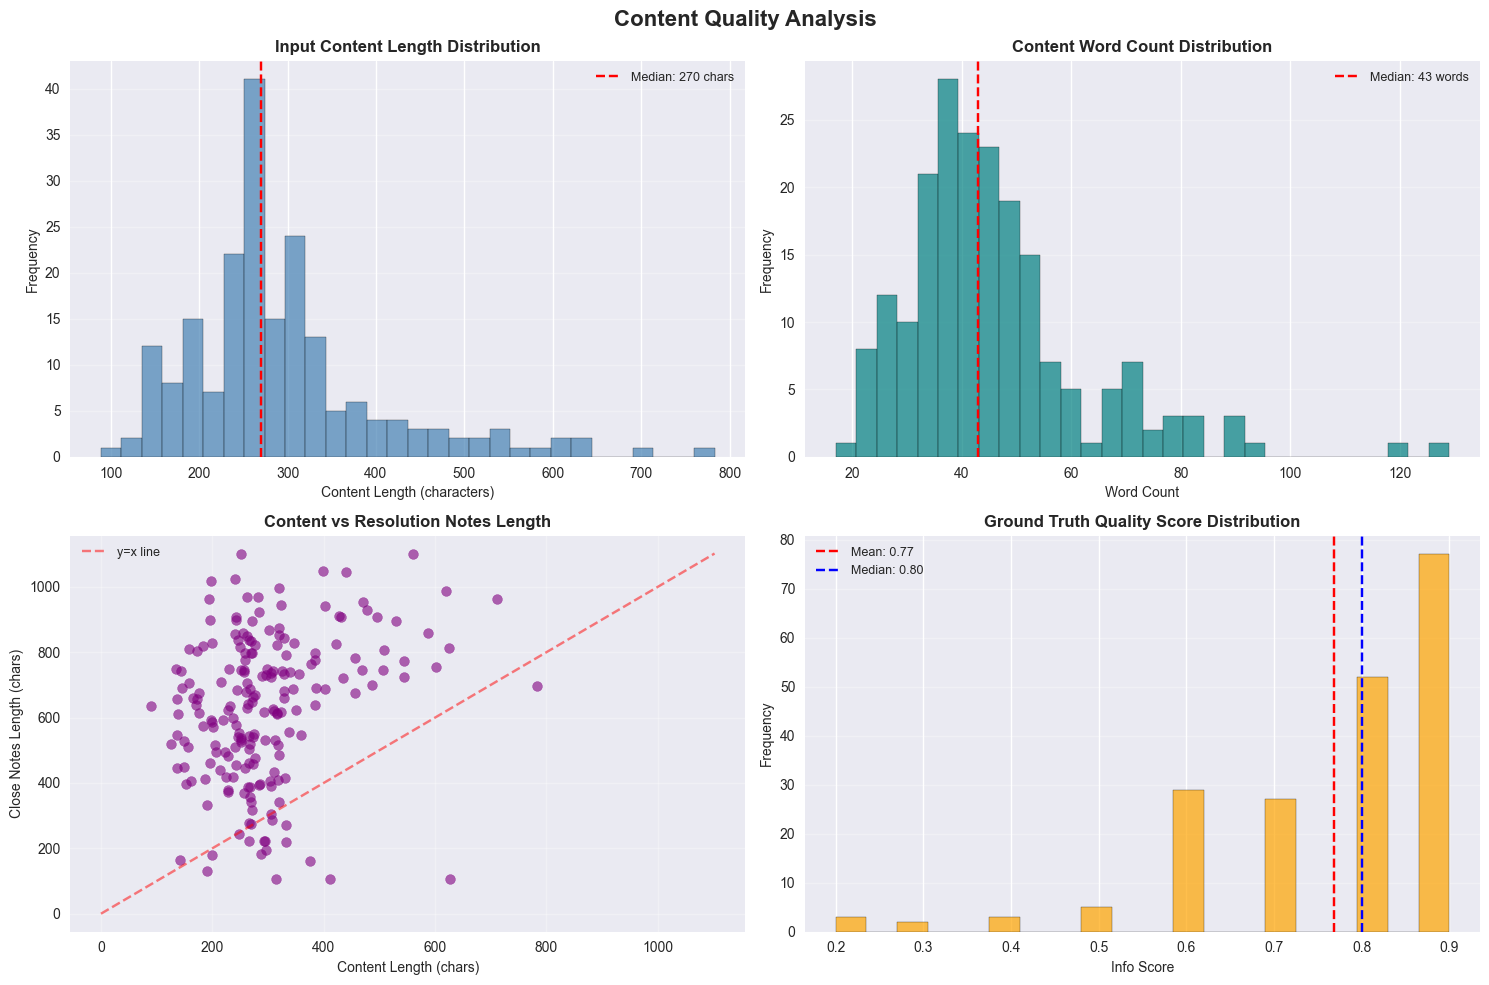


CONTENT QUALITY STATISTICS

📝 Input Content (for LLM enrichment):
   Average length: 295 characters
   Median length: 270 characters
   Average word count: 46 words
   Range: 89 - 783 characters

✅ Ground Truth (close_notes) Availability:
   Incidents with close_notes: 198 (99.0%)

📋 Resolution Notes (close_notes) Statistics:
   Average length: 629 characters
   Median length: 652 characters
   Average word count: 92 words
   Range: 106 - 1102 characters

📈 Content Expansion:
   Resolution notes are 2.13x longer than input content on average

⭐ Information Quality Score:
   Mean: 0.77
   Median: 0.80
   Range: 0.20 - 0.90
   High quality (≥0.8): 129 (65.2%)


In [41]:
# Comprehensive content analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Content Quality Analysis', fontsize=16, fontweight='bold')

# Calculate content metrics
if 'content' in df.columns:
    df['content_length'] = df['content'].astype(str).str.len()
    df['content_word_count'] = df['content'].astype(str).str.split().str.len()
    
    # 1. Content Length Distribution
    axes[0, 0].hist(df['content_length'], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    axes[0, 0].axvline(df['content_length'].median(), color='red', linestyle='--', 
                       label=f'Median: {df["content_length"].median():.0f} chars')
    axes[0, 0].set_xlabel('Content Length (characters)', fontsize=10)
    axes[0, 0].set_ylabel('Frequency', fontsize=10)
    axes[0, 0].set_title('Input Content Length Distribution', fontsize=12, fontweight='bold')
    axes[0, 0].grid(axis='y', alpha=0.3)
    axes[0, 0].legend(fontsize=9)
    
    # 2. Word Count Distribution
    axes[0, 1].hist(df['content_word_count'], bins=30, edgecolor='black', alpha=0.7, color='teal')
    axes[0, 1].axvline(df['content_word_count'].median(), color='red', linestyle='--', 
                       label=f'Median: {df["content_word_count"].median():.0f} words')
    axes[0, 1].set_xlabel('Word Count', fontsize=10)
    axes[0, 1].set_ylabel('Frequency', fontsize=10)
    axes[0, 1].set_title('Content Word Count Distribution', fontsize=12, fontweight='bold')
    axes[0, 1].grid(axis='y', alpha=0.3)
    axes[0, 1].legend(fontsize=9)
    
    # Check if close_notes exist (ground truth)
    if 'close_notes' in df.columns:
        has_close_notes = df['close_notes'].notna()
        df_with_gt = df[has_close_notes].copy()
        
        if len(df_with_gt) > 0:
            df_with_gt['close_notes_length'] = df_with_gt['close_notes'].astype(str).str.len()
            df_with_gt['close_notes_word_count'] = df_with_gt['close_notes'].astype(str).str.split().str.len()
            
            # 3. Content vs Close Notes Length Comparison
            axes[1, 0].scatter(df_with_gt['content_length'], df_with_gt['close_notes_length'], 
                              alpha=0.6, color='purple', s=50)
            axes[1, 0].plot([0, max(df_with_gt['content_length'].max(), df_with_gt['close_notes_length'].max())],
                            [0, max(df_with_gt['content_length'].max(), df_with_gt['close_notes_length'].max())],
                            'r--', alpha=0.5, label='y=x line')
            axes[1, 0].set_xlabel('Content Length (chars)', fontsize=10)
            axes[1, 0].set_ylabel('Close Notes Length (chars)', fontsize=10)
            axes[1, 0].set_title('Content vs Resolution Notes Length', fontsize=12, fontweight='bold')
            axes[1, 0].grid(alpha=0.3)
            axes[1, 0].legend(fontsize=9)
            
            # 4. Info Score Distribution
            if 'info_score_close_notes' in df_with_gt.columns:
                info_scores = df_with_gt['info_score_close_notes'].dropna()
                if len(info_scores) > 0:
                    axes[1, 1].hist(info_scores, bins=20, edgecolor='black', alpha=0.7, color='orange')
                    axes[1, 1].axvline(info_scores.mean(), color='red', linestyle='--', 
                                      label=f'Mean: {info_scores.mean():.2f}')
                    axes[1, 1].axvline(info_scores.median(), color='blue', linestyle='--', 
                                      label=f'Median: {info_scores.median():.2f}')
                    axes[1, 1].set_xlabel('Info Score', fontsize=10)
                    axes[1, 1].set_ylabel('Frequency', fontsize=10)
                    axes[1, 1].set_title('Ground Truth Quality Score Distribution', fontsize=12, fontweight='bold')
                    axes[1, 1].grid(axis='y', alpha=0.3)
                    axes[1, 1].legend(fontsize=9)

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\n" + "="*80)
print("CONTENT QUALITY STATISTICS")
print("="*80)
if 'content' in df.columns:
    print(f"\n📝 Input Content (for LLM enrichment):")
    print(f"   Average length: {df['content_length'].mean():.0f} characters")
    print(f"   Median length: {df['content_length'].median():.0f} characters")
    print(f"   Average word count: {df['content_word_count'].mean():.0f} words")
    print(f"   Range: {df['content_length'].min()} - {df['content_length'].max()} characters")
    
    if 'close_notes' in df.columns:
        has_close_notes = df['close_notes'].notna().sum()
        print(f"\n✅ Ground Truth (close_notes) Availability:")
        print(f"   Incidents with close_notes: {has_close_notes} ({has_close_notes/len(df)*100:.1f}%)")
        
        if has_close_notes > 0:
            df_with_gt = df[df['close_notes'].notna()].copy()
            df_with_gt['close_notes_length'] = df_with_gt['close_notes'].astype(str).str.len()
            df_with_gt['close_notes_word_count'] = df_with_gt['close_notes'].astype(str).str.split().str.len()
            
            print(f"\n📋 Resolution Notes (close_notes) Statistics:")
            print(f"   Average length: {df_with_gt['close_notes_length'].mean():.0f} characters")
            print(f"   Median length: {df_with_gt['close_notes_length'].median():.0f} characters")
            print(f"   Average word count: {df_with_gt['close_notes_word_count'].mean():.0f} words")
            print(f"   Range: {df_with_gt['close_notes_length'].min()} - {df_with_gt['close_notes_length'].max()} characters")
            
            # Expansion ratio
            expansion_ratio = df_with_gt['close_notes_length'].mean() / df_with_gt['content_length'].mean()
            print(f"\n📈 Content Expansion:")
            print(f"   Resolution notes are {expansion_ratio:.2f}x longer than input content on average")
            
            if 'info_score_close_notes' in df_with_gt.columns:
                info_scores = df_with_gt['info_score_close_notes'].dropna()
                if len(info_scores) > 0:
                    print(f"\n⭐ Information Quality Score:")
                    print(f"   Mean: {info_scores.mean():.2f}")
                    print(f"   Median: {info_scores.median():.2f}")
                    print(f"   Range: {info_scores.min():.2f} - {info_scores.max():.2f}")
                    high_quality = (info_scores >= 0.8).sum()
                    print(f"   High quality (≥0.8): {high_quality} ({high_quality/len(info_scores)*100:.1f}%)")
print("="*80)


## 7. Prepare Data for Experiments

Select and prepare incidents for enrichment experiments. We'll focus on incidents that have ground truth (close_notes) for evaluation.


In [42]:
# Filter incidents that have close_notes (ground truth) for evaluation
if 'close_notes' in df.columns:
    df_with_ground_truth = df[df['close_notes'].notna()].copy()
    print(f"Incidents with ground truth: {len(df_with_ground_truth)}")
    print(f"Incidents without ground truth: {len(df) - len(df_with_ground_truth)}")
    
    # For experiments, we'll use incidents with ground truth
    df_experiments = df_with_ground_truth.copy()
else:
    print("No close_notes column found - will use all incidents")
    df_experiments = df.copy()

print(f"\nTotal incidents prepared for experiments: {len(df_experiments)}")


Incidents with ground truth: 198
Incidents without ground truth: 2

Total incidents prepared for experiments: 198


## 8. Save Prepared Dataset

Save the prepared dataset for use in subsequent notebooks.


In [43]:
# Create data directory if it doesn't exist
data_dir = Path("../data")
data_dir.mkdir(exist_ok=True)

# Save the prepared dataset
output_path = data_dir / "incidents_prepared.csv"
df_experiments.to_csv(output_path, index=False)
print(f"✅ Saved prepared dataset to: {output_path}")
print(f"   Total records: {len(df_experiments)}")

# Also save a sample of incidents for quick testing
df_sample = df_experiments.sample(min(10, len(df_experiments)), random_state=42)
sample_path = data_dir / "incidents_sample.csv"
df_sample.to_csv(sample_path, index=False)
print(f"✅ Saved sample dataset to: {sample_path}")
print(f"   Sample records: {len(df_sample)}")


✅ Saved prepared dataset to: ../data/incidents_prepared.csv
   Total records: 198
✅ Saved sample dataset to: ../data/incidents_sample.csv
   Sample records: 10


## 9. Summary

This notebook has:
- ✅ Loaded the synthetic IT call center tickets dataset
- ✅ Explored dataset structure and characteristics
- ✅ Analyzed content and ground truth availability
- ✅ Prepared data for enrichment experiments
- ✅ Saved prepared datasets for next steps

**Next Steps:**
- Move to `02_prompt_experiments.ipynb` to test different prompts and LLM models
- Use the prepared dataset to generate enriched incident reports


In [44]:
# Display final summary
print("="*80)
print("NOTEBOOK SUMMARY")
print("="*80)
print(f"\n📊 Dataset loaded: {len(df)} total records")
print(f"📝 Prepared for experiments: {len(df_experiments)} records")
print(f"💾 Saved to: {output_path}")
print("\n✅ Ready for prompt experiments in the next notebook!")
print("="*80)


NOTEBOOK SUMMARY

📊 Dataset loaded: 200 total records
📝 Prepared for experiments: 198 records
💾 Saved to: ../data/incidents_prepared.csv

✅ Ready for prompt experiments in the next notebook!
